<a href="https://colab.research.google.com/github/ReJackTion/cartpole/blob/main/Classic_Balancing_Cart_Pole_Problem_using_Deep_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Test Random Environment with OpenAI Gym

In [ ]:
import gym 
import random

In [ ]:
env = gym.make('CartPole-v0')
states = env.observation_space.shape[0]
actions = env.action_space.n

In [ ]:
actions

2

In [ ]:
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        #env.render()
        action = random.choice([0,1])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

Episode:1 Score:21.0
Episode:2 Score:37.0
Episode:3 Score:24.0
Episode:4 Score:27.0
Episode:5 Score:10.0
Episode:6 Score:19.0
Episode:7 Score:44.0
Episode:8 Score:52.0
Episode:9 Score:26.0
Episode:10 Score:20.0


# 2. Create a Deep Learning Model with Keras

In [ ]:
import numpy as np
import tensorflow as tf

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
fc1 (Dense)                  (None, 64)                320       
_________________________________________________________________
fc2 (Dense)                  (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 2)                 66        
Total params: 2,466
Trainable params: 2,466
Non-trainable params: 0
_________________________________________________________________
None


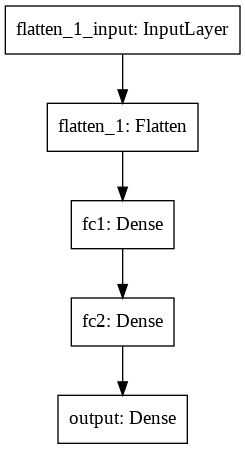

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1,states)),
  tf.keras.layers.Dense(64, activation='leaky_relu', kernel_regularizer='l2', name='fc1'),
  tf.keras.layers.Dense(32, activation='leaky_relu', kernel_regularizer='l2', name='fc2'),
  tf.keras.layers.Dense(actions, activation='linear', name='output')
  ])

print(model.summary())
tf.keras.utils.plot_model(model)

# 3. Build Agent with Keras-RL

In [ ]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [ ]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [ ]:
dqn = build_agent(model, actions)
dqn.compile(tf.keras.optimizersAdam(learning_rate=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


    1/10000 [..............................] - ETA: 5:51:47 - reward: 1.0000

/usr/local/lib/python3.7/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 124s 12ms/step - reward: 1.0000
117 episodes - episode_reward: 84.171 [9.000, 200.000] - loss: 5.442 - mae: 18.190 - mean_q: 36.651

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 122s 12ms/step - reward: 1.0000
50 episodes - episode_reward: 199.360 [168.000, 200.000] - loss: 14.456 - mae: 39.866 - mean_q: 80.278

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 125s 12ms/step - reward: 1.0000
50 episodes - episode_reward: 200.000 [200.000, 200.000] - loss: 13.145 - mae: 42.582 - mean_q: 85.485

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 125s 13ms/step - reward: 1.0000
50 episodes - episode_reward: 200.000 [200.000, 200.000] - loss: 11.602 - mae: 40.743 - mean_q: 81.719

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 127s 13ms/step - reward: 1.0000
done, took 623.532 seconds


In [ ]:
scores = dqn.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200
Episode 21: reward: 200.000, steps: 200
Episode 22: reward: 200.000, steps: 200
Episode 23: reward: 200.000, steps: 200
Episode 24: reward: 200.000, steps: 200
Episode 25: reward: 

In [ ]:
_ = dqn.test(env, nb_episodes=15, visualize=False)

Testing for 15 episodes ...


NoSuchDisplayException: ignored

# 4. Reloading Agent from Memory

In [ ]:
dqn.save_weights('dqn_weights.h5f', overwrite=True)

In [ ]:
del model
del dqn
del env

In [ ]:
env = gym.make('CartPole-v0')
actions = env.action_space.n
states = env.observation_space.shape[0]

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1,states)),
  tf.keras.layers.Dense(64, activation='leaky_relu', kernel_regularizer='l2', name='fc1'),
  tf.keras.layers.Dense(32, activation='leaky_relu', kernel_regularizer='l2', name='fc2'),
  tf.keras.layers.Dense(actions, activation='linear', name='output')
  ])

dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
dqn.load_weights('dqn_weights.h5f')

In [ ]:
_ = dqn.test(env, nb_episodes=5, visualize=False)

Testing for 5 episodes ...


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
